# EvaCar

In [82]:
# Import necessary libraries, packages, and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from datetime import datetime

## 1. Business understanding

### 1.1. Initial analysis

In [3]:
# Load data and create dataframe
df = pd.read_csv("../datasets/RawDataDB.csv")

In [4]:
# Display a sample of data
df.sample(10)

,manufacturer,model,mileage,year,fuel,price,currency,city,county,status,short_description,long_description
13473,Hyundai,Grand,187 517 km,2017,Diesel,22 750,EUR,Cluj-Napoca,Cluj,Publicat,Santa Fe 2.2 CRDi ISG 4WD Aut. Exclusive,2 199 cm3 • 200 CP • GARANTIE*RATE*4x4*200Cp*A...
13048,Ford,Focus,91 500 km,2018,Diesel,18 999,EUR,Cluj-Napoca,Cluj,Publicat,2.0 EcoBlue ST-Line,1 995 cm3 • 150 CP • Ford Focus ST Line 2.0/ T...
19381,Mercedes-Benz,S,165 000 km,2014,Benzina,29 899,EUR,Titesti,Arges,Publicat,[],4 663 cm3 • 455 CP
16438,Mercedes-Benz,GLE 400,81 402 km,2020,Diesel,71 400,EUR,Braila,Braila,Reactualizat,d 4MATIC,2 925 cm3 • 330 CP • Mercedes-Benz GLE 400 d 4...
35633,Volvo,C40 Recharge,10 000 km,2022,Electric,69 459,EUR,Cluj-Napoca,Cluj,Reactualizat,Twin Motor AWD Plus,408 CP • Garantie producator / Rate / Leasing ...
3830,BMW,M8 Competition,65 000 km,2020,Benzina,89 900,EUR,Domnesti,Bucuresti,Reactualizat,Gran Coupe,4 395 cm3 • 625 CP • ‼️ Posibilitate RATE/LEAS...
15874,Land Rover,Range,210 000 km,2016,Diesel,31 900,EUR,Beclean,Bistrita-Nasaud,Publicat,Rover Vogue,4 390 cm3 • 300 CP • Land Rover Vogue Autobiog...
17275,Mercedes-Benz,S Maybach,20 km,2022,Benzina,228 118,EUR,Ilfov,Bucuresti,Publicat,Mercedes-Maybach 680 4MATIC Long,5 980 cm3 • 612 CP • Maybach S680/4D Sound Sys...
17671,Mercedes-Benz,CLA 250,237 000 km,2023,Hibrid,61 599,EUR,Voluntari,Bucuresti,Publicat,e Coupe,1 332 cm3 • 160 CP • Mercedes Benz CLA250e Coupe
33536,Volkswagen,Tiguan,117 000 km,2021,Hibrid,23 800,EUR,Valenii,de,Publicat,1.4 eHybrid OPF Elegance,"1 395 cm3 • 150 CP • R LINE,1proprietar,dotari..."


In [5]:
# Describe 
df.describe(include="all")

,manufacturer,model,mileage,year,fuel,price,currency,city,county,status,short_description,long_description
count,36534,36534,36456,36534.000000,36534,36534,36534,36534,36532,36534,36400,36534
unique,64,1075,13600,NaN,6,6862,2,687,122,2,9676,30012
top,Mercedes-Benz,Passat,1 km,NaN,Diesel,7 990,EUR,Bucuresti,Bucuresti,Publicat,[],1 968 cm3 • 150 CP
freq,4857,1144,704,NaN,22736,178,36499,8696,12848,20101,9024,216
mean,NaN,NaN,NaN,2016.112909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,5.113379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1966.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Display information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36534 entries, 0 to 36533
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   manufacturer       36534 non-null  object
 1   model              36534 non-null  object
 2   mileage            36456 non-null  object
 3   year               36534 non-null  int64 
 4   fuel               36534 non-null  object
 5   price              36534 non-null  object
 6   currency           36534 non-null  object
 7   city               36534 non-null  object
 8   county             36532 non-null  object
 9   status             36534 non-null  object
 10  short_description  36400 non-null  object
 11  long_description   36534 non-null  object
dtypes: int64(1), object(11)
memory usage: 3.3+ MB


### 1.2. Process data

In [7]:
# Extract data based on specific element
def extract_data(raw_data: str, splitter: str, specific_element: str) -> str:
    """
    Take a raw elements and return specific part of it
    """
    element = 0
    if type(raw_data) == str:
        raw_element = raw_data.split(f"{splitter}")
        for modified_element in raw_element:
            if element == 0:
                if modified_element.endswith(f"{specific_element}"):
                    element = "".join(modified_element.split(" ")[:-1])
    raw_data = element
    
    return raw_data


# Remove spaces
def remove_space(raw_data: str) -> str:
    """
    Take a raw element and return element with removed white spaces
    """
    raw_data = "".join(raw_data.split(" "))
    
    return raw_data

In [8]:
# Add capacity column
capacity = df["long_description"].apply(extract_data, args=[" • ", "cm3"])
df.insert(loc=3, column="capacity", value=capacity)

In [9]:
# Add power column
power = df["long_description"].apply(extract_data, args=[" • ", "CP"])
df.insert(loc=4, column="power", value=power)

In [10]:
# Delete unnecessary columns
df = df.drop(columns=['short_description', 'long_description'])

In [11]:
# Process mileage column
df["mileage"] = df["mileage"].apply(extract_data, args=[" • ", "km"])

In [12]:
# Remove white spaces from price column
df["price"] = df["price"].apply(remove_space)

In [13]:
# Replace NaN values with zero in mileage column
df['mileage'] = df['mileage'].fillna(0)

In [14]:
# Change data types
data_types = {"mileage": int,
              "capacity": int,
              "power": int,
              "year": int,
              "price": int}

df = df.astype(data_types)

### 1.3. Final analysis

In [15]:
# Display a sample of data
df.sample(10)

,manufacturer,model,mileage,capacity,power,year,fuel,price,currency,city,county,status
35891,Volvo,XC 90,16000,1969,235,2019,Diesel,55979,EUR,Bucuresti,Bucuresti,Reactualizat
18127,Mercedes-Benz,GLE 250,192000,2143,204,2017,Diesel,26950,EUR,Baia,Mare,Publicat
16734,Mercedes-Benz,S 500,224000,2999,435,2021,Diesel,105000,EUR,Voluntari,Bucuresti,Reactualizat
14919,Kia,XCeed,37900,1580,105,2021,Hibrid,20690,EUR,Iasi,Iasi,Reactualizat
23375,Opel,Astra,241972,1956,164,2012,Diesel,4700,EUR,Bucuresti,Bucuresti,Publicat
33600,Volkswagen,Polo,230000,1198,64,2007,Benzina,2790,EUR,Targu,Secuiesc,Publicat
30503,Toyota,RAV4,1000,2487,185,2023,Hibrid,39975,EUR,Alba,Iulia,Publicat
18018,Mercedes-Benz,Sprinter 313,163294,2148,129,2006,Diesel,6700,EUR,Alba,Iulia,Reactualizat
3709,BMW,Seria 7,196000,2993,265,2016,Diesel,34900,EUR,Bucuresti,Bucuresti,Publicat
24202,Peugeot,5008,101223,1997,180,2018,Diesel,25990,EUR,Cluj-Napoca,Cluj,Publicat


In [16]:
# Describe 
df.describe(include="all")

,manufacturer,model,mileage,capacity,power,year,fuel,price,currency,city,county,status
count,36534,36534,3.653400e+04,36534.000000,36534.000000,36534.000000,36534,36534.000000,36534,36534,36532,36534
unique,64,1075,NaN,NaN,NaN,NaN,6,NaN,2,687,122,2
top,Mercedes-Benz,Passat,NaN,NaN,NaN,NaN,Diesel,NaN,EUR,Bucuresti,Bucuresti,Publicat
freq,4857,1144,NaN,NaN,NaN,NaN,22736,NaN,36499,8696,12848,20101
mean,NaN,NaN,1.395080e+05,1949.920184,181.762933,2016.112909,NaN,27166.135134,NaN,NaN,NaN,NaN
std,NaN,NaN,9.784439e+04,768.616655,100.162335,5.113379,NaN,35552.730026,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,0.000000,0.000000,1966.000000,NaN,300.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,6.140000e+04,1498.000000,115.000000,2013.000000,NaN,8857.500000,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.440000e+05,1968.000000,150.000000,2017.000000,NaN,15991.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.060000e+05,1999.000000,204.000000,2020.000000,NaN,30999.000000,NaN,NaN,NaN,NaN


In [17]:
# Display information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36534 entries, 0 to 36533
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   manufacturer  36534 non-null  object
 1   model         36534 non-null  object
 2   mileage       36534 non-null  int32 
 3   capacity      36534 non-null  int32 
 4   power         36534 non-null  int32 
 5   year          36534 non-null  int32 
 6   fuel          36534 non-null  object
 7   price         36534 non-null  int32 
 8   currency      36534 non-null  object
 9   city          36534 non-null  object
 10  county        36532 non-null  object
 11  status        36534 non-null  object
dtypes: int32(5), object(7)
memory usage: 2.6+ MB


In [18]:
# Save processed dataframe to CSV
df.to_csv("../datasets/ProcessedDataDB.csv")

## 2. Data understanding

### 2.1. Answer business questions

In [19]:
# 1. How many cars are used in the analyze?
no_analyzed_cars = df.shape[0]
print(f"Number of cars used in current analyze is equal to {no_analyzed_cars} cars.")

Number of cars used in current analyze is equal to 36534 cars.


In [20]:
# 2.1. Which is the most expensive car?
expensive_car = df.loc[df['price'] == df['price'].max()]
print(f"The most expensive car in current analyze is {expensive_car.iloc[0,0]} {expensive_car.iloc[0,1]} that costs {expensive_car.iloc[0,7]} {expensive_car.iloc[0,8]}.")

The most expensive car in current analyze is Ferrari Purosangue that costs 918680 EUR.


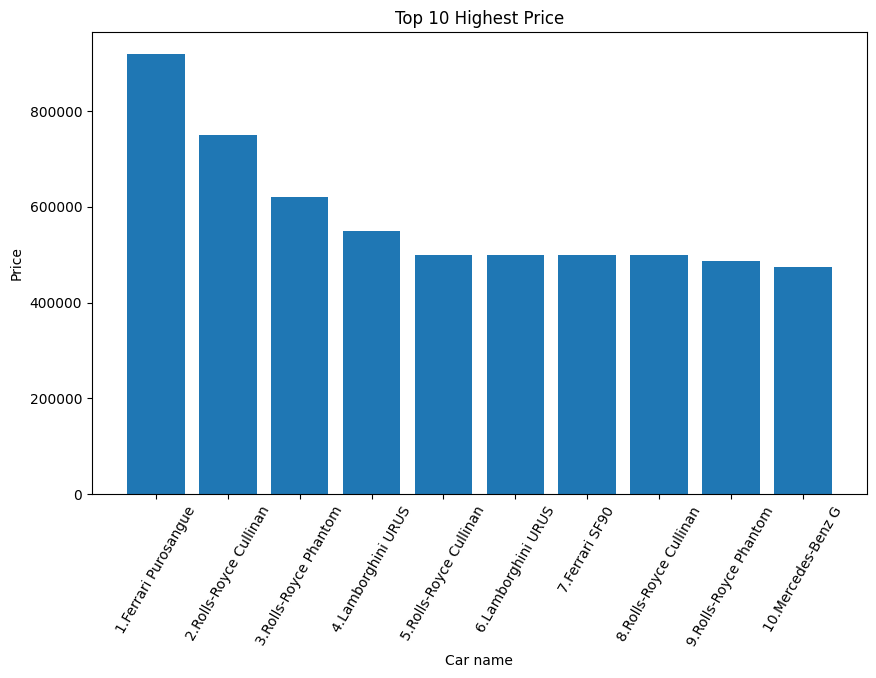

In [265]:
# 2.1.1. Plot 10 most expensive cars
top_10_cars = df.sort_values(by="price", ascending=False).head(10)

# Generate list with names
top_10_names = []
for index in range(10):
    top_10_names.append(f"{index+1}.{top_10_cars['manufacturer'].iloc[index]} {top_10_cars['model'].iloc[index]}")

# Plot Top 10 expensive cars
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_10_names, top_10_cars['price'])
ax.set_xticks(top_10_names)
ax.set_xticklabels(top_10_names, rotation=60)
ax.set_xlabel('Car name')
ax.set_ylabel('Price')
ax.set_title('Top 10 Highest Price')
plt.show()

In [218]:
# 2.2. Which is the cheapest car?
cheap_car = df.loc[df['price'] == df['price'].min()]
print(f"The cheapest car in current analyze is {cheap_car.iloc[0,0]} {cheap_car.iloc[0,1]} that costs {cheap_car.iloc[0,7]} {cheap_car.iloc[0,8]}.")

The cheapest car in current analyze is Volkswagen Golf that costs 300 EUR.


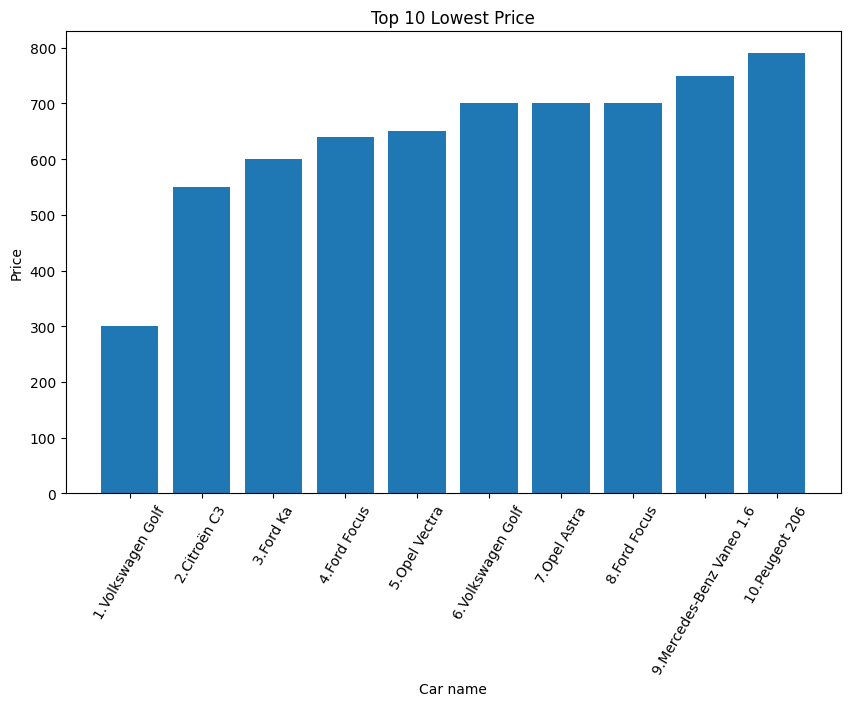

In [268]:
# 2.2.1. Plot 10 cheapest cars
bottom_10_cars = df.sort_values(by="price", ascending=True).head(10)

# Generate list with names
bottom_10_names = []
for index in range(10):
    bottom_10_names.append(f"{index+1}.{bottom_10_cars['manufacturer'].iloc[index]} {bottom_10_cars['model'].iloc[index]}")

# Plot Top 10 cheapest cars
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(bottom_10_names, bottom_10_cars['price'])
ax.set_xticks(bottom_10_names)
ax.set_xticklabels(bottom_10_names, rotation=60)
ax.set_xlabel('Car name')
ax.set_ylabel('Price')
ax.set_title('Top 10 Lowest Price')
plt.show()

In [275]:
# 3.1. Which manufacturer has more cars?
more_manufact_no_cars = df['manufacturer'].value_counts().iloc[0]
more_manufact_name = df['manufacturer'].mode().iloc[0]
print(f"Manufacturer with most cars is {more_manufact_name} with {more_manufact_no_cars} cars.")


Manufacturer with most cars is Mercedes-Benz with 4857 cars.


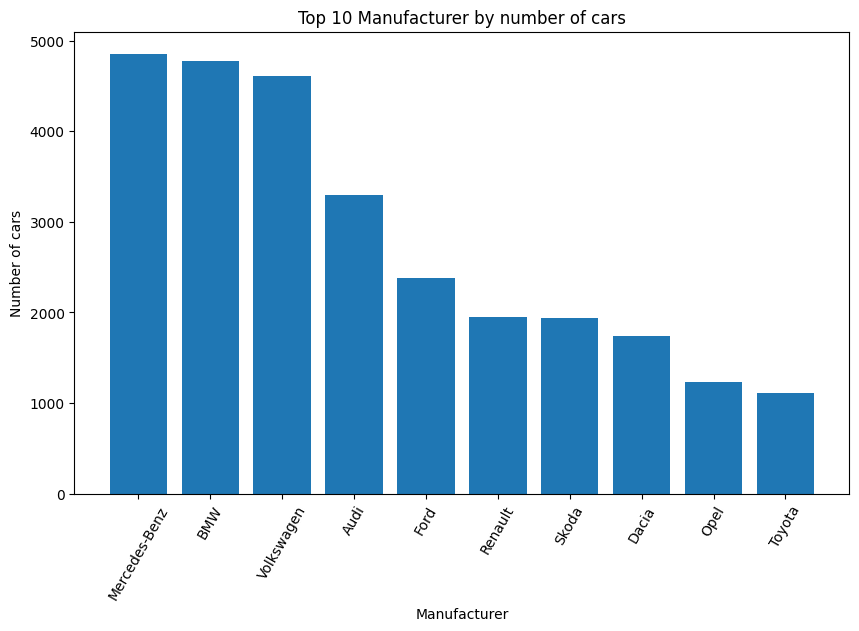

In [313]:
# 3.1.1. Plot 10 manufacturer with most cars
count_10_manufact = df["manufacturer"].value_counts().sort_values(ascending=False).head(10)
manufact_names = count_10_manufact.index[:].to_list()

# Plot Top 10 manufacturer by number of cars
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(manufact_names, count_10_manufact)
ax.set_xticks(manufact_names)
ax.set_xticklabels(manufact_names, rotation=60)
ax.set_xlabel('Manufacturer')
ax.set_ylabel('Number of cars')
ax.set_title('Top 10 Manufacturer by number of cars')
plt.show()

In [318]:
# 3.2. Which model has more cars?
more_model_no_cars = df['model'].value_counts().iloc[0]
more_model_name = df['model'].mode().iloc[0]
print(f"The most cars are of model {more_model_name} with {more_model_no_cars} cars.")

The most cars are of model Passat with 1144 cars.


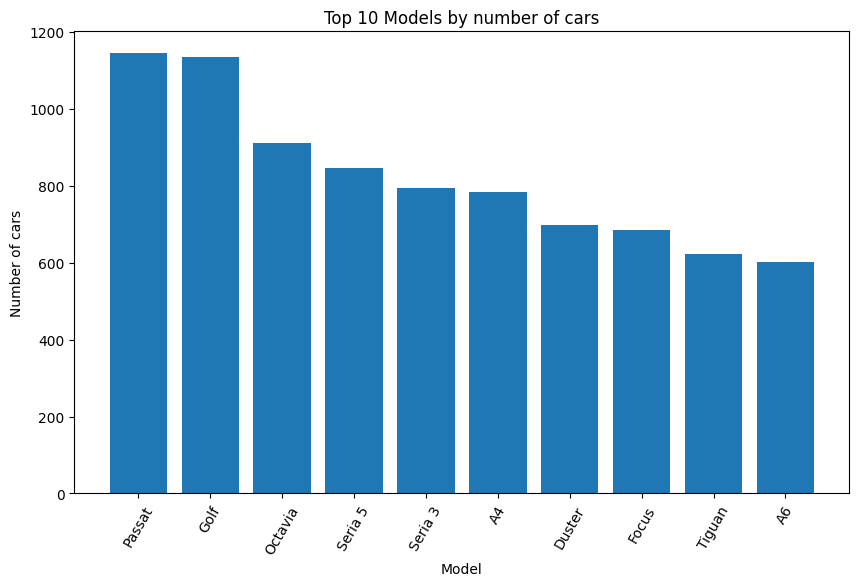

In [315]:
# 3.2.1. Plot 10 model with most cars
count_10_model = df["model"].value_counts().sort_values(ascending=False).head(10)
model_names = count_10_model.index[:].to_list()

# Plot Top 10 manufacturer by number of cars
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(model_names, count_10_model)
ax.set_xticks(model_names)
ax.set_xticklabels(model_names, rotation=60)
ax.set_xlabel('Model')
ax.set_ylabel('Number of cars')
ax.set_title('Top 10 Models by number of cars')
plt.show()

In [147]:
# 3.3. Which manufacturer has less cars?
manufact_no_cars = df['manufacturer'].value_counts().min()
manufact_name = df['manufacturer'].value_counts().idxmin()
print(f"Manufacturer with most cars is {manufact_name} with {manufact_no_cars} cars.")

Manufacturer with most cars is Ineos with 1 cars.


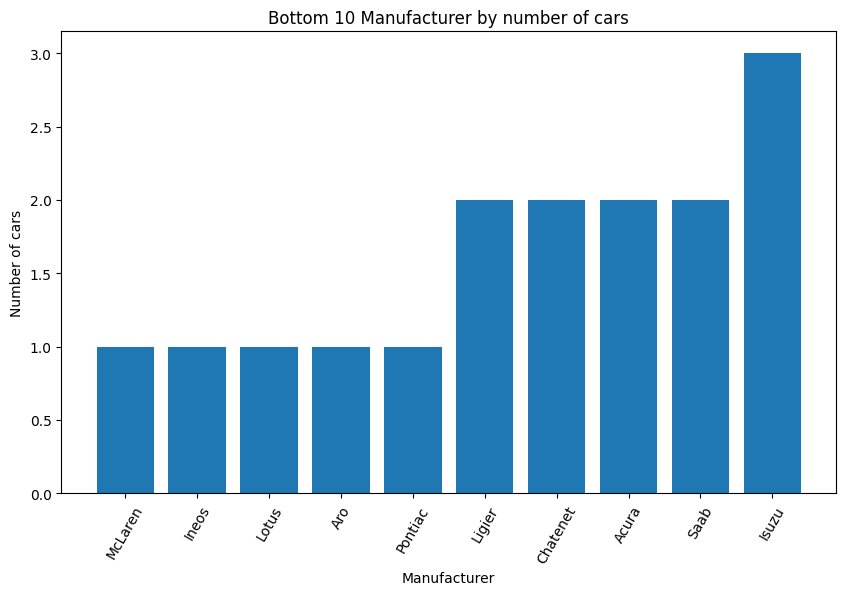

In [320]:
# 3.3.1. Plot 10 manufacturer with fewest cars
count_10_manufact = df["manufacturer"].value_counts().sort_values(ascending=True).head(10)
manufact_names = count_10_manufact.index[:].to_list()

# Plot Bottom 10 manufacturer by number of cars
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(manufact_names, count_10_manufact)
ax.set_xticks(manufact_names)
ax.set_xticklabels(manufact_names, rotation=60)
ax.set_xlabel('Manufacturer')
ax.set_ylabel('Number of cars')
ax.set_title('Bottom 10 Manufacturer by number of cars')
plt.show()

In [322]:
# 3.4. Which model has less cars?
model_no_cars = df['model'].value_counts().min()
model_name = df['model'].value_counts().idxmin()
print(f"Model with fewest cars is {model_name} with {model_no_cars} cars.")

Model with fewest cars is M2 M235i with 1 cars.


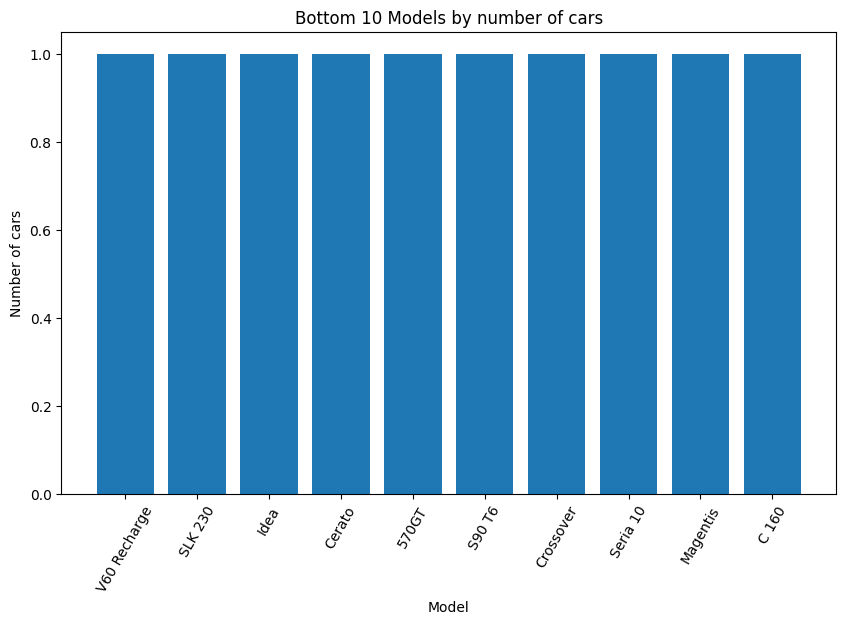

In [323]:
# 3.4.1. Plot 10 model with fewest cars
count_10_model = df["model"].value_counts().sort_values(ascending=True).head(10)
model_names = count_10_model.index[:].to_list()

# Plot Bottom 10 manufacturer by number of cars
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(model_names, count_10_model)
ax.set_xticks(model_names)
ax.set_xticklabels(model_names, rotation=60)
ax.set_xlabel('Model')
ax.set_ylabel('Number of cars')
ax.set_title('Bottom 10 Models by number of cars')
plt.show()

In [152]:
# 4.1. Which manufacturer is the most expensive at average?
expensive_avg_price_per_manufact = df.groupby('manufacturer')['price'].mean().sort_values(ascending=False)
print(f"The most expensive manufacturer at average is {expensive_avg_price_per_manufact.index[0]} with average price of {expensive_avg_price_per_manufact.iloc[0]} EUR/car.")

The most expensive manufacturer at average is Rolls-Royce with average price of 364534.1 EUR/car.


In [154]:
# 4.2. Which model is the most expensive at average?
expensive_avg_price_per_model = df.groupby('model')['price'].mean().sort_values(ascending=False)
print(f"The most expensive model at average is {expensive_avg_price_per_model.index[0]} with average price of {expensive_avg_price_per_model.iloc[0]} EUR/car.")

The most expensive model at average is Purosangue with average price of 918680.0 EUR/car.


In [155]:
# 4.3. Which manufacturer is most cheap at average?
cheap_avg_price_per_manufact = df.groupby('manufacturer')['price'].mean().sort_values(ascending=True)
print(f"The cheapest manfacturer at average is {cheap_avg_price_per_manufact.index[0]} with average price of {cheap_avg_price_per_manufact.iloc[0]} EUR/car.")

The cheapest manfacturer at average is Daewoo with average price of 1229.6 EUR/car.


In [157]:
# 4.4. Which model is most cheap at average?
cheap_avg_price_per_model = df.groupby('model')['price'].mean().sort_values(ascending=True)
print(f"The cheapest model at average is {cheap_avg_price_per_model.index[0]} with average price of {cheap_avg_price_per_model.iloc[0]} EUR/car.")

The cheapest model at average is Vaneo 1.6 with average price of 750.0 EUR/car.


In [158]:
# 5.1. In which county are selling most cars?
county_max_cars = df['county'].value_counts()
print(f"The most cars are in {county_max_cars.idxmax()} county with {county_max_cars.max()} cars.")


The most cars are in Bucuresti county with 12848 cars.


In [159]:
# 5.2. In which city are selling most cars?
city_max_cars = df['city'].value_counts()
print(f"The most cars are in {city_max_cars.idxmax()} city with {city_max_cars.max()} cars.")

The most cars are in Bucuresti city with 8696 cars.


In [176]:
# 5.3. In which county are selling fewest cars?
county_max_cars = df['county'].value_counts()
print(f"The fewest cars are in {county_max_cars.idxmin()} county with {county_max_cars.min()} cars.")

The fewest cars are in German county with 1 cars.


In [177]:
# 5.4. In which city are selling fewest cars?
city_max_cars = df['city'].value_counts()
print(f"The fewest cars are in {city_max_cars.idxmin()} city with {city_max_cars.min()} cars.")

The fewest cars are in Maneciu-Ungureni city with 1 cars.


In [178]:
# 6.1. Which type of fuel is the most selling?
fuel_max_count = df['fuel'].value_counts()
print(f"The most cars with total number of {fuel_max_count.max()} cars are used {fuel_max_count.idxmax()} fuel.")

The most cars with total number of 22736 cars are used Diesel fuel.


In [179]:
# 6.2. Which type of fuel is the less selling?
fuel_min_count = df['fuel'].value_counts()
print(f"The fewest cars with total number of {fuel_min_count.min()} cars are used {fuel_min_count.idxmin()} fuel.")

The fewest cars with total number of 18 cars are used Benzina + CNG fuel.


In [180]:
# 7.1. Which is the biggest engine capacity?
max_capacity = df[df['capacity'] == df['capacity'].max()]
print(f"The max capacity of {max_capacity['capacity'].iloc[0]} HP has {max_capacity['manufacturer'].iloc[0]} {max_capacity['model'].iloc[0]}.")

The max capacity of 8200 HP has Cadillac Eldorado.


In [181]:
# 7.2. Which is the smallest engine capacity?
min_capacity = df[df['capacity'] == df['capacity'].min()]
print(f"The max capacity of {min_capacity['capacity'].iloc[0]} HP has {min_capacity['manufacturer'].iloc[0]} {min_capacity['model'].iloc[0]}.")

The max capacity of 0 HP has Aixam City.


In [184]:
# 8.1. Which is the biggest milleage?
max_mileage = df[df['mileage'] == df['mileage'].max()]
print(f"The max mileage of {max_mileage['mileage'].iloc[0]} KM has {max_mileage['manufacturer'].iloc[0]} {max_mileage['model'].iloc[0]}.")

The max mileage of 2800000 KM has BMW X5 xDrive30d.


In [185]:
# 8.2. Which is the smallest milleage?
min_mileage = df[df['mileage'] == df['mileage'].min()]
print(f"The min mileage of {min_mileage['mileage'].iloc[0]} KM has {min_mileage['manufacturer'].iloc[0]} {min_mileage['model'].iloc[0]}.")

The min mileage of 0 KM has Aixam Crossover.


In [186]:
# 9. How many cars are manufactured in current year?
current_year = datetime.now().year
current_year_no_cars = df[df['year'] == 2023].shape[0]
print(f"Number of cars that were manufactured in 2023 is {current_year_no_cars}.")

Number of cars that were manufactured in 2023 is 2782.
